# Import Libraries & Load Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [39]:
df_us1 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_0.csv')
df_us2 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_1.csv')
df_us3 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_2.csv')
df_us4 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_3.csv')
df_us5 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_4.csv')
df_us6 = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/US_events_5.csv')

In [40]:
# Concatenate all dataframes vertically
df_events = pd.concat([df_us1, df_us2, df_us3,df_us4, df_us5,df_us6], axis=0)

# Reset the index if needed
df_events = df_events.reset_index(drop=True)

In [41]:
df_events.shape

(541963, 13)

### events.csv
**Columns:**
1. **id**: Unique identifier for each event.
2. **user_id**: Identifier for the user associated with the event.
3. **sequence_number**: Sequence number of the event.
4. **session_id**: Identifier for the session during which the event occurred.
5. **created_at**: Timestamp indicating when the event took place.
6. **ip_address**: IP address from which the event originated.
7. **city**: City where the event occurred.
8. **state**: State where the event occurred.
9. **postal_code**: Postal code of the event location.
10. **browser**: Web browser used during the event.
11. **traffic_source**: Source of the traffic leading to the event.
12. **uri**: Uniform Resource Identifier associated with the event.
13. **event_type**: Type of event recorded.

Use events.csv to analyze user behavior, including session patterns, traffic sources, and event types.

# Exploring the Data


**Key Findings**
* Roughly 47% of "user_id" had a value of NaN. This means only 53% of user_id values were non NaN values.

**Unknown users (user_id = NaN):**
* Product is the highest event type, with no sign of any purchases ever being made here.

**Knowon Users (user_id != NaN):**
* Cart, Department, Product all tied with the highest event type. Purchase came in 2nd. So, only users who had a user_id seemed to make a purchase.

**All Users:**
* The Highest Traffic Source was by far email, followed by adwords.
* The most used browser by all users is Chrome. Firefox comes in 2nd and Safari is 3rd.
* Product is the highest event type, Department and cart are tied for 2nd.
* California has the highest sessions, 2nd place is Texas, 3rd is Florida.

**Busiest Time of the Year**
* Jan, Nov and Dec were the busiest times for Traffic and Events. During these months, purchases and browsing activity increased.
* Feburary was the lowest time for purchases and Traffic activity.

**Correlation:**
* High positive correlation between region_West and postal_code. This is most likely because of the high amount of California sessions in the data.
* Medium negative correlation between region_Northeast and postal_code. Not a lot of sessions from this region.



In [42]:
# Events
df_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2244720,NaN,3,9cadf286-9b30-459e-9a57-14fc2dac8cc9,2022-06-19 12:07:00+00:00,3.149.42.105,New York,New York,10023,Chrome,Adwords,/cancel,cancel
1,1347063,NaN,3,84ae95f4-d7cd-4bde-a003-21d305b2e824,2023-10-11 01:41:00+00:00,68.124.172.198,New York,New York,10306,Firefox,Email,/cancel,cancel
2,1670844,NaN,3,94c3d822-49e6-4fb7-8ed7-713667f99d68,2021-03-18 19:20:00+00:00,177.217.215.96,New York,New York,10457,Chrome,YouTube,/cancel,cancel
3,2007823,NaN,3,4c248995-3e0b-41b5-a81a-2705279aeab9,2023-09-26 08:45:00+00:00,37.255.80.241,New York,New York,10457,Firefox,Adwords,/cancel,cancel
4,1517051,NaN,3,36b7879c-523f-4ec8-9a90-d1ac9fae1166,2022-04-19 08:36:00+00:00,76.11.158.90,New York,New York,10469,Other,Adwords,/cancel,cancel


In [43]:
# Making sure it only has US states included and that it's working
df_events['state'].unique()

array(['New York', 'Pennsylvania', 'Virginia', 'Maryland',
       'Massachusetts', 'North Carolina', 'Rhode Island',
       'South Carolina', 'Georgia', 'New Hampshire', 'Florida', 'Alabama',
       'Tennessee', 'Kentucky', 'Ohio', 'Maine', 'Indiana', 'Michigan',
       'Iowa', 'Wisconsin', 'Minnesota', 'Montana', 'Illinois',
       'Missouri', 'Connecticut', 'Kansas', 'Nebraska', 'New Jersey',
       'Louisiana', 'Arkansas', 'Oklahoma', 'Texas', 'Colorado',
       'Wyoming', 'Idaho', 'Utah', 'Arizona', 'New Mexico', 'Nevada',
       'California', 'Oregon', 'Washington', 'Alaska', 'Delaware',
       'West Virginia', 'Mississippi', 'Vermont', 'South Dakota',
       'North Dakota', 'Hawaii'], dtype=object)

In [44]:
# Check missing data
df_events.isna().sum()

,0
id,0
user_id,252555
sequence_number,0
session_id,0
created_at,0
ip_address,0
city,4071
state,0
postal_code,0
browser,0


In [45]:
df_events.shape

(541963, 13)

## Unknown Users (user_id = NaN)

In [46]:
df_events_nan = df_events[df_events['user_id'].isna()]
df_events_nan

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2244720,NaN,3,9cadf286-9b30-459e-9a57-14fc2dac8cc9,2022-06-19 12:07:00+00:00,3.149.42.105,New York,New York,10023,Chrome,Adwords,/cancel,cancel
1,1347063,NaN,3,84ae95f4-d7cd-4bde-a003-21d305b2e824,2023-10-11 01:41:00+00:00,68.124.172.198,New York,New York,10306,Firefox,Email,/cancel,cancel
2,1670844,NaN,3,94c3d822-49e6-4fb7-8ed7-713667f99d68,2021-03-18 19:20:00+00:00,177.217.215.96,New York,New York,10457,Chrome,YouTube,/cancel,cancel
3,2007823,NaN,3,4c248995-3e0b-41b5-a81a-2705279aeab9,2023-09-26 08:45:00+00:00,37.255.80.241,New York,New York,10457,Firefox,Adwords,/cancel,cancel
4,1517051,NaN,3,36b7879c-523f-4ec8-9a90-d1ac9fae1166,2022-04-19 08:36:00+00:00,76.11.158.90,New York,New York,10469,Other,Adwords,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541495,2260364,NaN,1,6d7fef50-c08a-42d9-839e-17f31a78f7b1,2022-08-29 16:50:00+00:00,132.45.81.39,Spokane,Washington,99205,Chrome,Facebook,/product/4707,product
541496,1546883,NaN,2,63f0d6b0-5e46-465b-bbde-a2ec7f5eef13,2021-05-27 05:20:00+00:00,45.124.251.71,Spokane Valley,Washington,99206,Firefox,Email,/product/19857,product
541499,2248675,NaN,1,b4581d58-9e5b-43cf-92aa-8cb3f45a1d09,2020-12-23 11:01:00+00:00,86.73.254.38,Pasco,Washington,99301,Safari,Facebook,/product/14359,product
541500,1787620,NaN,2,b6de7aa6-2340-40e7-a600-d4669ab29448,2022-01-30 03:19:00+00:00,124.130.177.25,Kennewick,Washington,99336,Chrome,Email,/product/19663,product


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

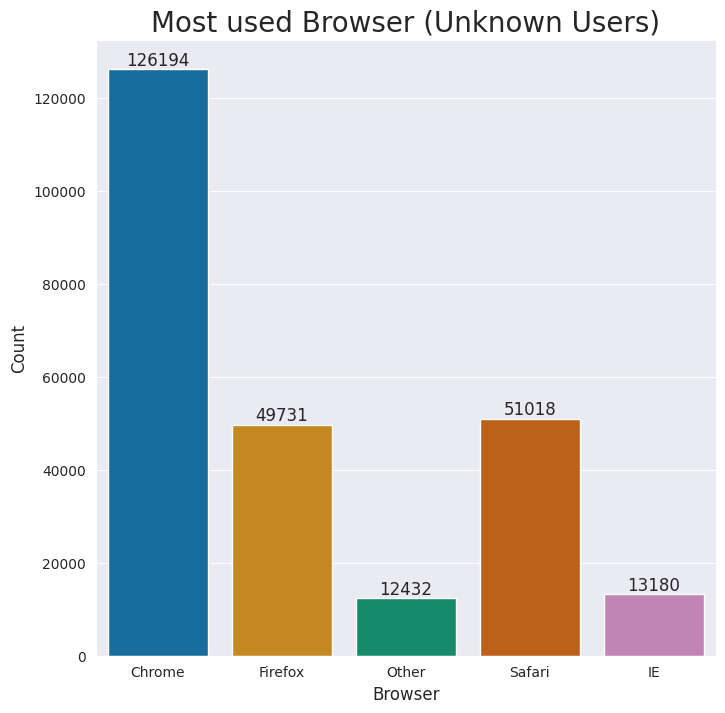

In [47]:
# Size of chart
plt.figure(figsize=(8, 8))

# The Barplots
sns.set_style("darkgrid")
ax = sns.countplot(x="browser", data=df_events_nan, hue='browser', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Browser", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Most used Browser (Unknown Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

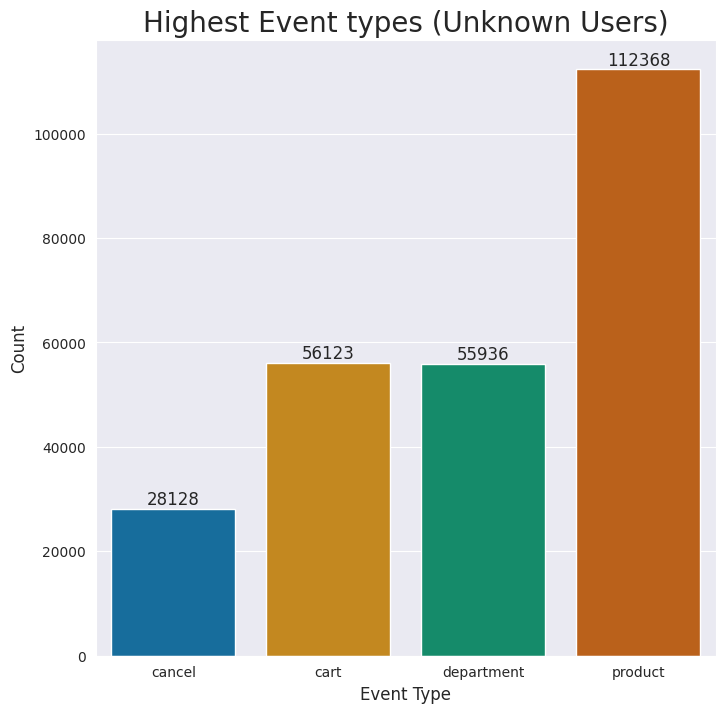

In [48]:
top_10_event_type = df_events_nan['event_type'].value_counts().nlargest(10).index
df_top_event_type = df_events_nan[df_events_nan['event_type'].isin(top_10_event_type)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="event_type", data= df_top_event_type, hue='event_type', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Event types (Unknown Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

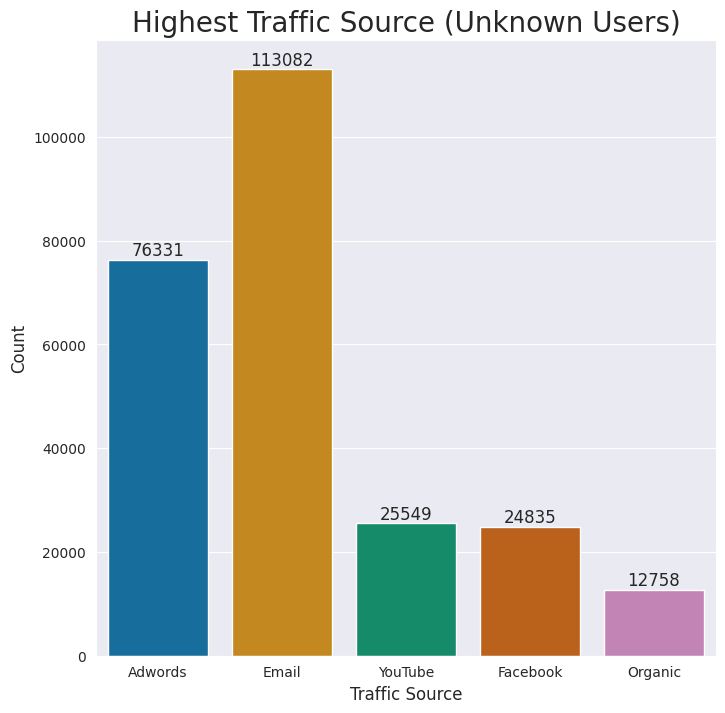

In [49]:
traffic_src_count = df_events_nan['traffic_source'].value_counts()
traffic_src_count

top_10_traffic = df_events_nan['traffic_source'].value_counts().nlargest(10).index
df_top_traffic = df_events_nan[df_events_nan['traffic_source'].isin(top_10_traffic)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="traffic_source", data= df_top_traffic, hue='traffic_source', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Traffic Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Traffic Source (Unknown Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

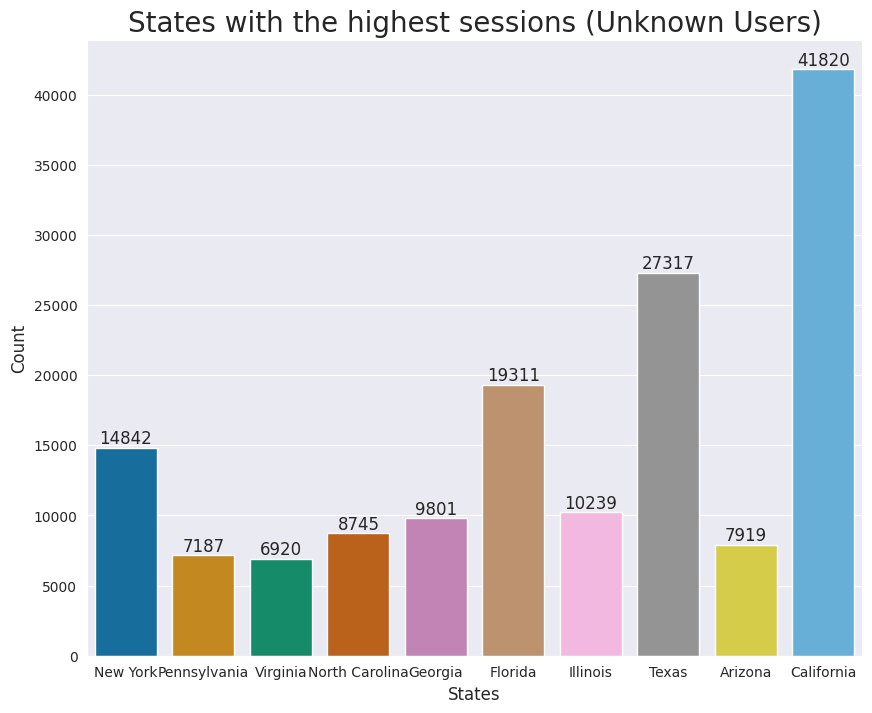

In [50]:
top_10_states = df_events_nan['state'].value_counts().nlargest(10).index
df_top_states = df_events_nan[df_events_nan['state'].isin(top_10_states)]

# The Barplots
plt.figure(figsize=(10, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="state", data= df_top_states, hue='state', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("States", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("States with the highest sessions (Unknown Users)", fontsize=20)
plt.show()

## Known Users (user_id not NaN)

In [51]:
df_events['event_type'].unique()

array(['cancel', 'cart', 'department', 'home', 'product', 'purchase'],
      dtype=object)

In [52]:
df_events_users = df_events[df_events['user_id'].isna() == False]
df_events_users

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
290,312700,23896.0,3,2cf97a3a-8044-4403-bbc7-ffad55378b04,2023-09-19 08:26:36+00:00,144.177.220.206,New York,New York,10002,Other,Adwords,/cart,cart
291,32848,2537.0,12,93af6a52-b4ee-476d-945c-619e70b2383c,2023-02-20 13:50:08+00:00,201.118.3.122,New York,New York,10002,Chrome,Adwords,/cart,cart
294,1061365,81117.0,6,fd08788e-89a5-4a85-b262-2f22c0f0e090,2022-08-19 12:05:47+00:00,223.28.176.253,New York,New York,10010,Chrome,YouTube,/cart,cart
295,126279,9793.0,6,a5675506-e789-48ff-98b3-ecbd94a1fe0f,2023-06-23 09:46:53+00:00,25.163.58.193,New York,New York,10024,Chrome,Adwords,/cart,cart
297,357439,27392.0,6,2dcb6a28-a57a-4a11-963c-4d3776dbc970,2021-04-14 14:30:34+00:00,34.188.132.245,New York,New York,10025,Chrome,Adwords,/cart,cart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541958,272976,20884.0,5,cc38375c-c065-4b01-82d4-9756b5fd59dc,2019-05-24 07:49:06+00:00,111.88.7.163,Port Orchard,Washington,98366,Safari,Email,/purchase,purchase
541959,269610,20624.0,13,27a73bc9-02da-489c-95e4-1a463afdd7a5,2023-04-20 12:53:32+00:00,207.137.149.45,Suquamish,Washington,98370,Safari,Email,/purchase,purchase
541960,1239584,94801.0,13,6e4ea230-b536-4747-9aee-261254e36b17,2022-11-10 08:48:43+00:00,129.187.237.135,Lakewood,Washington,98499,Firefox,YouTube,/purchase,purchase
541961,1257822,96163.0,5,1abb536c-b12b-4de0-b8de-f21d233d129f,2023-02-07 11:00:13+00:00,101.144.122.53,Fords Prairie,Washington,98531,Safari,Adwords,/purchase,purchase


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

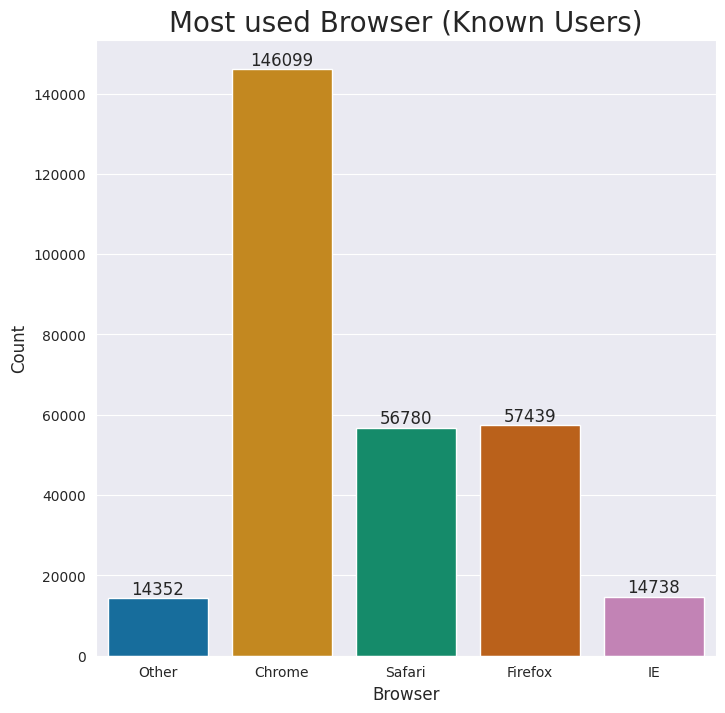

In [53]:
# Size of chart
plt.figure(figsize=(8, 8))

# The Barplots
sns.set_style("darkgrid")
ax = sns.countplot(x="browser", data=df_events_users, hue='browser', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Browser", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Most used Browser (Known Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

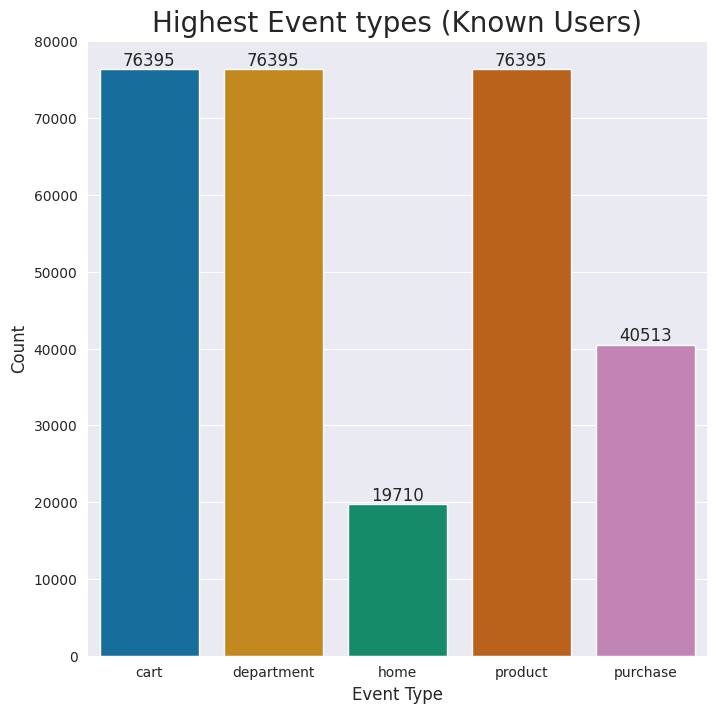

In [54]:
user_top_10_events = df_events_users['event_type'].value_counts().nlargest(10).index
user_event_types = df_events_users[df_events_users['event_type'].isin(user_top_10_events)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="event_type", data= user_event_types, hue='event_type', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Event types (Known Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

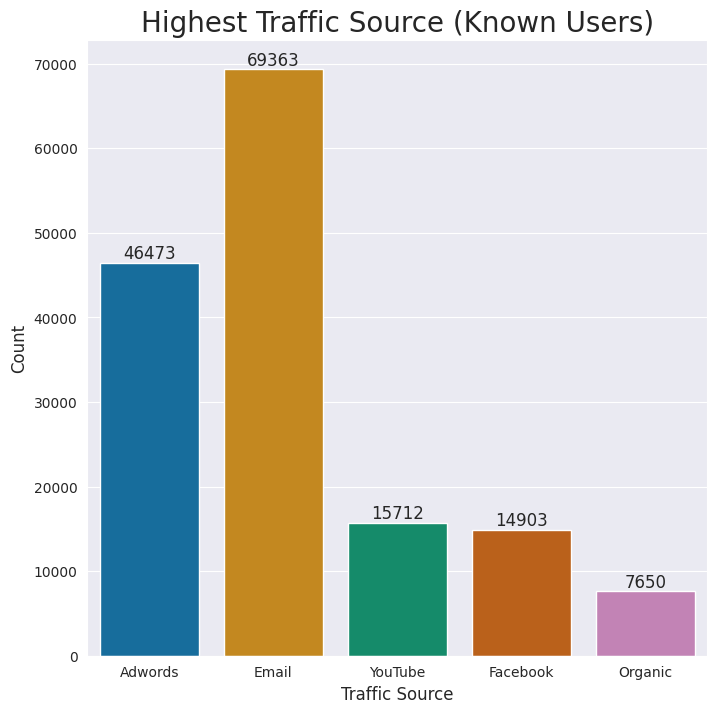

In [55]:
traffic_src_count = df_events_users['traffic_source'].value_counts()
traffic_src_count

top_10_traffic = df_events_users['traffic_source'].value_counts().nlargest(10).index
df_top_traffic = df_events_users[df_events_users['traffic_source'].isin(top_10_traffic)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="traffic_source", data= df_top_states, hue='traffic_source', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Traffic Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Traffic Source (Known Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

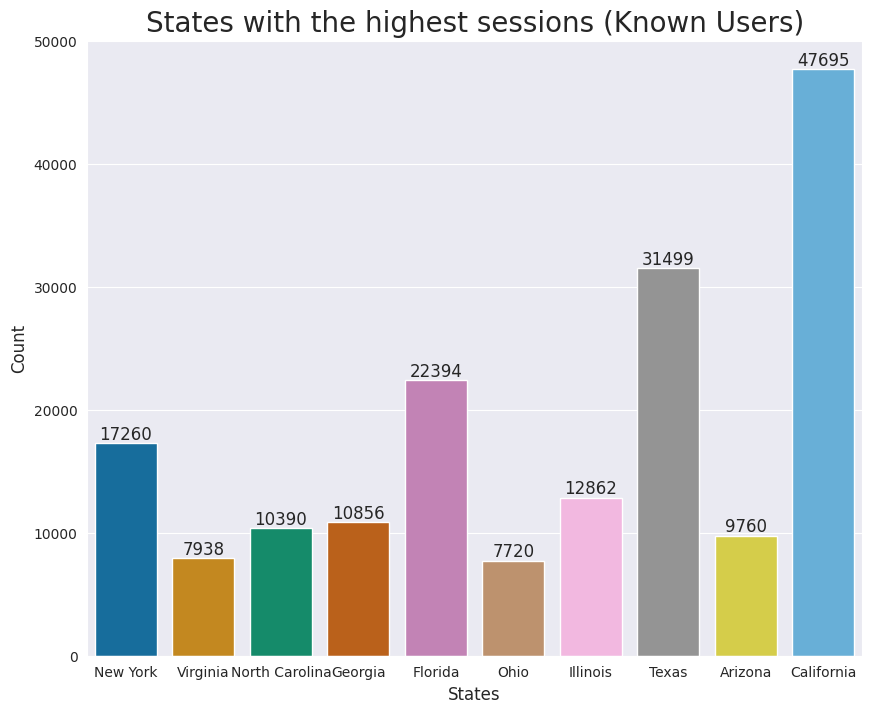

In [56]:
top_10_states = df_events_users['state'].value_counts().nlargest(10).index
df_top_states = df_events_users[df_events_users['state'].isin(top_10_states)]

# The Barplots
plt.figure(figsize=(10, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="state", data= df_top_states, hue='state', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("States", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("States with the highest sessions (Known Users)", fontsize=20)
plt.show()

## All Users

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

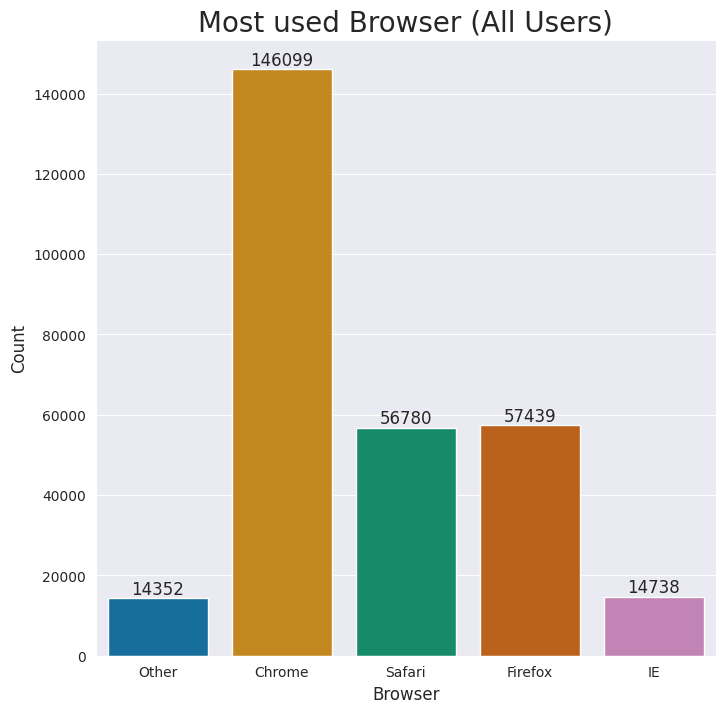

In [57]:
# Size of chart
plt.figure(figsize=(8, 8))

# The Barplots
sns.set_style("darkgrid")
ax = sns.countplot(x="browser", data=user_event_types, hue='browser', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Browser", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Most used Browser (All Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

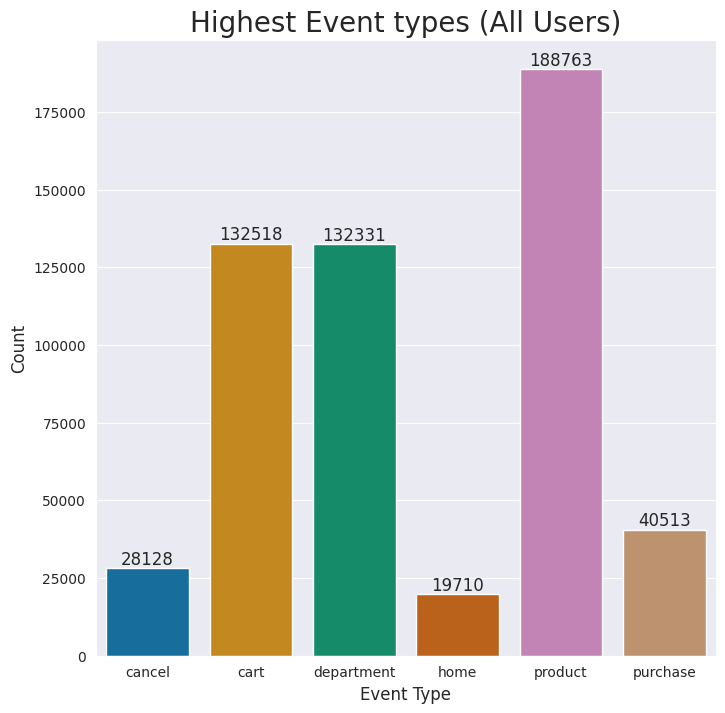

In [58]:
user_top_10_events = df_events['event_type'].value_counts().nlargest(10).index
user_event_types = df_events[df_events['event_type'].isin(user_top_10_events)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="event_type", data= user_event_types, hue='event_type', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Event types (All Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

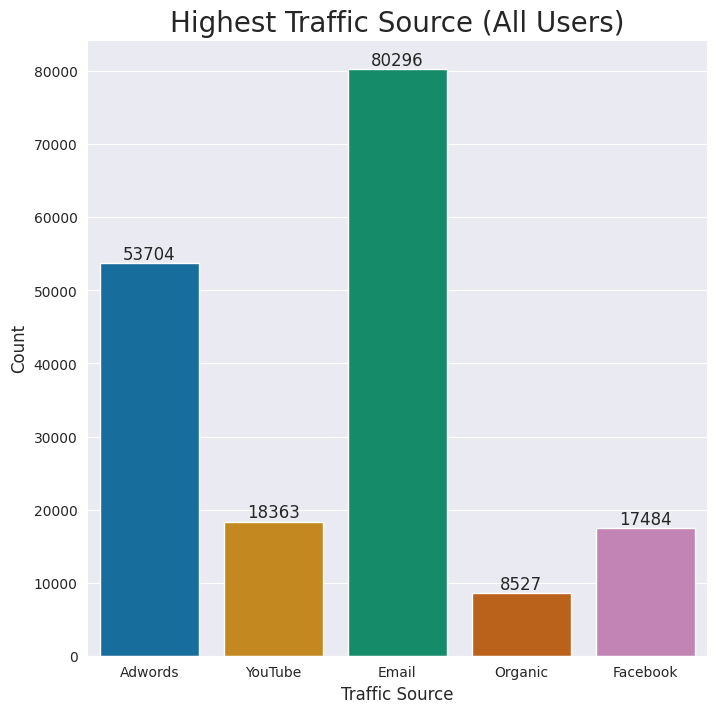

In [59]:
traffic_src_count = df_events['traffic_source'].value_counts()
traffic_src_count

top_10_traffic = df_events['traffic_source'].value_counts().nlargest(10).index
df_top_traffic = df_events[df_events['traffic_source'].isin(top_10_traffic)]

# The Barplots
plt.figure(figsize=(8, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="traffic_source", data= df_top_states, hue='traffic_source', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("Traffic Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Highest Traffic Source (All Users)", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

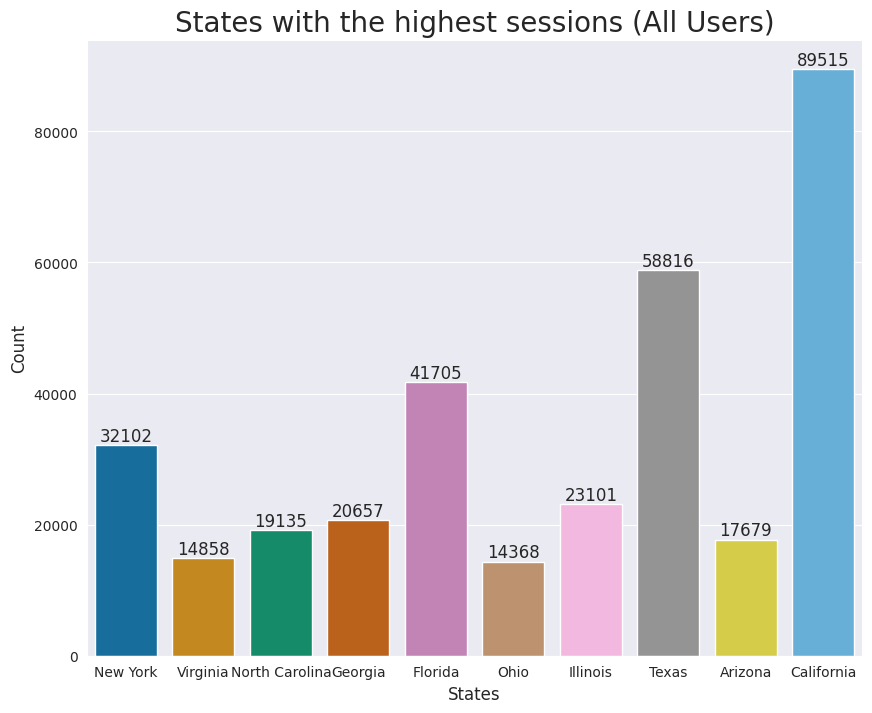

In [60]:
top_10_states = df_events['state'].value_counts().nlargest(10).index
df_top_states = df_events[df_events['state'].isin(top_10_states)]

# The Barplots
plt.figure(figsize=(10, 8))

sns.set_style("darkgrid")
ax = sns.countplot(x="state", data= df_top_states, hue='state', palette="colorblind", legend=False)

# Show number values above the bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels
plt.xlabel("States", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("States with the highest sessions (All Users)", fontsize=20)
plt.show()

## Busiest Time of the Year

In [61]:
# Changed the "created_at" into datetime data type
df_events['created_at'] = pd.to_datetime(df_events['created_at'], errors = 'coerce')

df_events = df_events.dropna(subset='created_at', how='all')

df_events['created_at']

,created_at
0,2022-06-19 12:07:00+00:00
1,2023-10-11 01:41:00+00:00
2,2021-03-18 19:20:00+00:00
3,2023-09-26 08:45:00+00:00
4,2022-04-19 08:36:00+00:00
...,...
541957,2023-12-09 17:34:42+00:00
541958,2019-05-24 07:49:06+00:00
541959,2023-04-20 12:53:32+00:00
541960,2022-11-10 08:48:43+00:00


In [62]:
# This avoids SettingWithCopyWarning
df_events = df_events.copy()

# Extract hour, day of the week, and month from 'order_created_at' and create new columns
df_events['order_hour'] = df_events['created_at'].dt.hour
df_events['order_day_of_week'] = df_events['created_at'].dt.dayofweek
df_events['order_month'] = df_events['created_at'].dt.month

print(df_events[['order_hour', 'order_day_of_week', 'order_month']].head())

   order_hour  order_day_of_week  order_month
0          12                  6            6
1           1                  2           10
2          19                  3            3
3           8                  1            9
4           8                  1            4


In [63]:
list(df_events.columns)

['id',
 'user_id',
 'sequence_number',
 'session_id',
 'created_at',
 'ip_address',
 'city',
 'state',
 'postal_code',
 'browser',
 'traffic_source',
 'uri',
 'event_type',
 'order_hour',
 'order_day_of_week',
 'order_month']

In [64]:
df_time = df_events.drop(columns=['user_id','created_at','session_id','id','sequence_number','ip_address','uri'])
df_time.dropna(inplace=True)
df_time.head()

,city,state,postal_code,browser,traffic_source,event_type,order_hour,order_day_of_week,order_month
0,New York,New York,10023,Chrome,Adwords,cancel,12,6,6
1,New York,New York,10306,Firefox,Email,cancel,1,2,10
2,New York,New York,10457,Chrome,YouTube,cancel,19,3,3
3,New York,New York,10457,Firefox,Adwords,cancel,8,1,9
4,New York,New York,10469,Other,Adwords,cancel,8,1,4


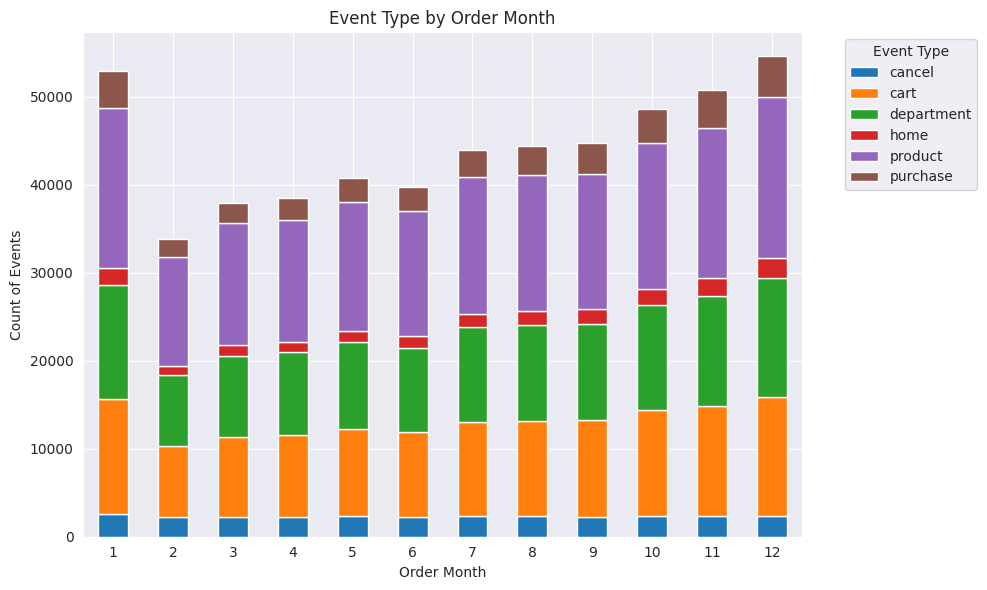

In [88]:
# Group by 'order_month' and 'event_type' and count occurrences
grouped_data = df_time.groupby(['order_month', 'event_type']).size().unstack()

# Plot the graph
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Move the legend outside
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Event Type by Order Month')
plt.xlabel('Order Month')
plt.ylabel('Count of Events')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

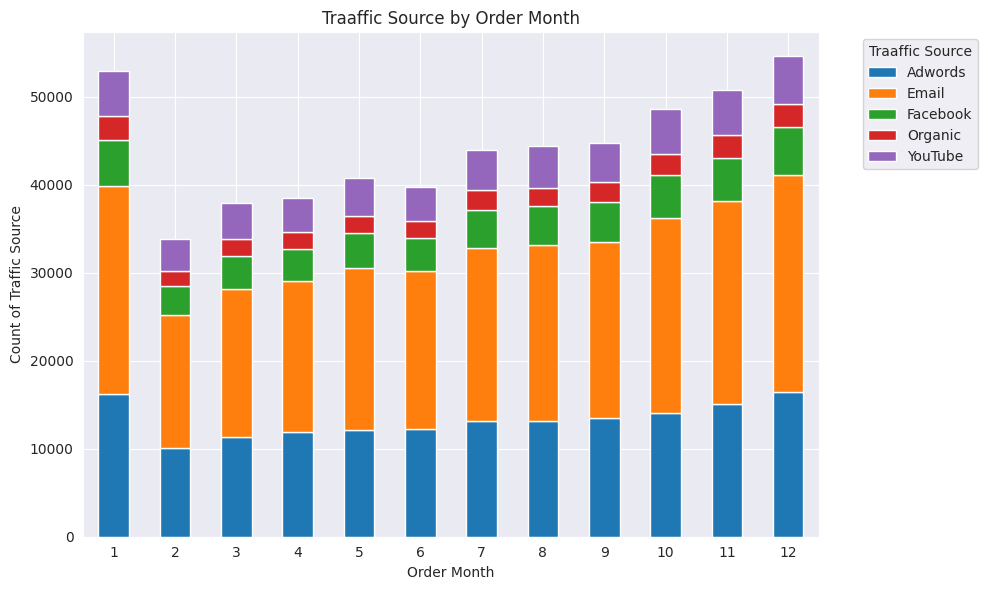

In [93]:
# Group by 'order_month' and 'event_type' and count occurrences
grouped_data = df_time.groupby(['order_month', 'traffic_source']).size().unstack()

# Plot the graph
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Move the legend outside
plt.legend(title='Traaffic Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Traaffic Source by Order Month')
plt.xlabel('Order Month')
plt.ylabel('Count of Traffic Source')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation Maps

## Correlation with U.S. Regions (All Users)

In [65]:
# Convert States to regions
region_map = {
    "California": "West", "Oregon": "West", "Washington": "West", "Nevada": "West", "Idaho": "West",
    "Montana": "West", "Wyoming": "West", "Colorado": "West", "Utah": "West", "Alaska": "West", "Hawaii": "West",
    "Illinois": "Midwest", "Indiana": "Midwest", "Iowa": "Midwest", "Kansas": "Midwest", "Michigan": "Midwest",
    "Minnesota": "Midwest", "Missouri": "Midwest", "Nebraska": "Midwest", "North Dakota": "Midwest", "Ohio": "Midwest",
    "South Dakota": "Midwest", "Wisconsin": "Midwest",
    "Arizona": "Southwest", "New Mexico": "Southwest", "Oklahoma": "Southwest", "Texas": "Southwest",
    "Alabama": "Southeast", "Arkansas": "Southeast", "Florida": "Southeast", "Georgia": "Southeast",
    "Kentucky": "Southeast", "Louisiana": "Southeast", "Mississippi": "Southeast", "North Carolina": "Southeast",
    "South Carolina": "Southeast", "Tennessee": "Southeast", "Virginia": "Southeast", "West Virginia": "Southeast",
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast", "New Hampshire": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast", "Rhode Island": "Northeast",
    "Vermont": "Northeast"
}

df_events["region"] = df_events["state"].map(region_map)
df_events['region']

,region
0,Northeast
1,Northeast
2,Northeast
3,Northeast
4,Northeast
...,...
541957,West
541958,West
541959,West
541960,West


In [66]:
df_events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,order_hour,order_day_of_week,order_month,region
0,2244720,NaN,3,9cadf286-9b30-459e-9a57-14fc2dac8cc9,2022-06-19 12:07:00+00:00,3.149.42.105,New York,New York,10023,Chrome,Adwords,/cancel,cancel,12,6,6,Northeast
1,1347063,NaN,3,84ae95f4-d7cd-4bde-a003-21d305b2e824,2023-10-11 01:41:00+00:00,68.124.172.198,New York,New York,10306,Firefox,Email,/cancel,cancel,1,2,10,Northeast
2,1670844,NaN,3,94c3d822-49e6-4fb7-8ed7-713667f99d68,2021-03-18 19:20:00+00:00,177.217.215.96,New York,New York,10457,Chrome,YouTube,/cancel,cancel,19,3,3,Northeast
3,2007823,NaN,3,4c248995-3e0b-41b5-a81a-2705279aeab9,2023-09-26 08:45:00+00:00,37.255.80.241,New York,New York,10457,Firefox,Adwords,/cancel,cancel,8,1,9,Northeast
4,1517051,NaN,3,36b7879c-523f-4ec8-9a90-d1ac9fae1166,2022-04-19 08:36:00+00:00,76.11.158.90,New York,New York,10469,Other,Adwords,/cancel,cancel,8,1,4,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541957,765203,58583.0,5,f446efa8-eb98-46df-9c49-74c49acf2dbb,2023-12-09 17:34:42+00:00,209.20.78.1,Oak Harbor,Washington,98277,Safari,Email,/purchase,purchase,17,5,12,West
541958,272976,20884.0,5,cc38375c-c065-4b01-82d4-9756b5fd59dc,2019-05-24 07:49:06+00:00,111.88.7.163,Port Orchard,Washington,98366,Safari,Email,/purchase,purchase,7,4,5,West
541959,269610,20624.0,13,27a73bc9-02da-489c-95e4-1a463afdd7a5,2023-04-20 12:53:32+00:00,207.137.149.45,Suquamish,Washington,98370,Safari,Email,/purchase,purchase,12,3,4,West
541960,1239584,94801.0,13,6e4ea230-b536-4747-9aee-261254e36b17,2022-11-10 08:48:43+00:00,129.187.237.135,Lakewood,Washington,98499,Firefox,YouTube,/purchase,purchase,8,3,11,West


In [67]:
df_events.dtypes

,0
id,int64
user_id,float64
sequence_number,int64
session_id,object
created_at,"datetime64[ns, UTC]"
ip_address,object
city,object
state,object
postal_code,int64
browser,object


In [68]:
# Exclude unwanted features
# --------------------------
columns_to_exclude = ['sequence_number','id','ip_address', 'city', 'state', 'uri', 'session_id','created_at']
df_regions = df_events.drop(columns=columns_to_exclude)

In [69]:
# Fill NaN values with -1
# --------------------------
df_regions = df_regions.fillna({"user_id": -1})
df_regions

,user_id,postal_code,browser,traffic_source,event_type,order_hour,order_day_of_week,order_month,region
0,-1.0,10023,Chrome,Adwords,cancel,12,6,6,Northeast
1,-1.0,10306,Firefox,Email,cancel,1,2,10,Northeast
2,-1.0,10457,Chrome,YouTube,cancel,19,3,3,Northeast
3,-1.0,10457,Firefox,Adwords,cancel,8,1,9,Northeast
4,-1.0,10469,Other,Adwords,cancel,8,1,4,Northeast
...,...,...,...,...,...,...,...,...,...
541957,58583.0,98277,Safari,Email,purchase,17,5,12,West
541958,20884.0,98366,Safari,Email,purchase,7,4,5,West
541959,20624.0,98370,Safari,Email,purchase,12,3,4,West
541960,94801.0,98499,Firefox,YouTube,purchase,8,3,11,West


In [70]:
# One hot encode whats left
one_hot_columns = ['traffic_source', 'browser', 'event_type','region']

df_encoded_region = pd.get_dummies(df_regions, columns=one_hot_columns, drop_first=False, dtype=int)
list(df_encoded_region.columns)

['user_id',
 'postal_code',
 'order_hour',
 'order_day_of_week',
 'order_month',
 'traffic_source_Adwords',
 'traffic_source_Email',
 'traffic_source_Facebook',
 'traffic_source_Organic',
 'traffic_source_YouTube',
 'browser_Chrome',
 'browser_Firefox',
 'browser_IE',
 'browser_Other',
 'browser_Safari',
 'event_type_cancel',
 'event_type_cart',
 'event_type_department',
 'event_type_home',
 'event_type_product',
 'event_type_purchase',
 'region_Midwest',
 'region_Northeast',
 'region_Southeast',
 'region_Southwest',
 'region_West']

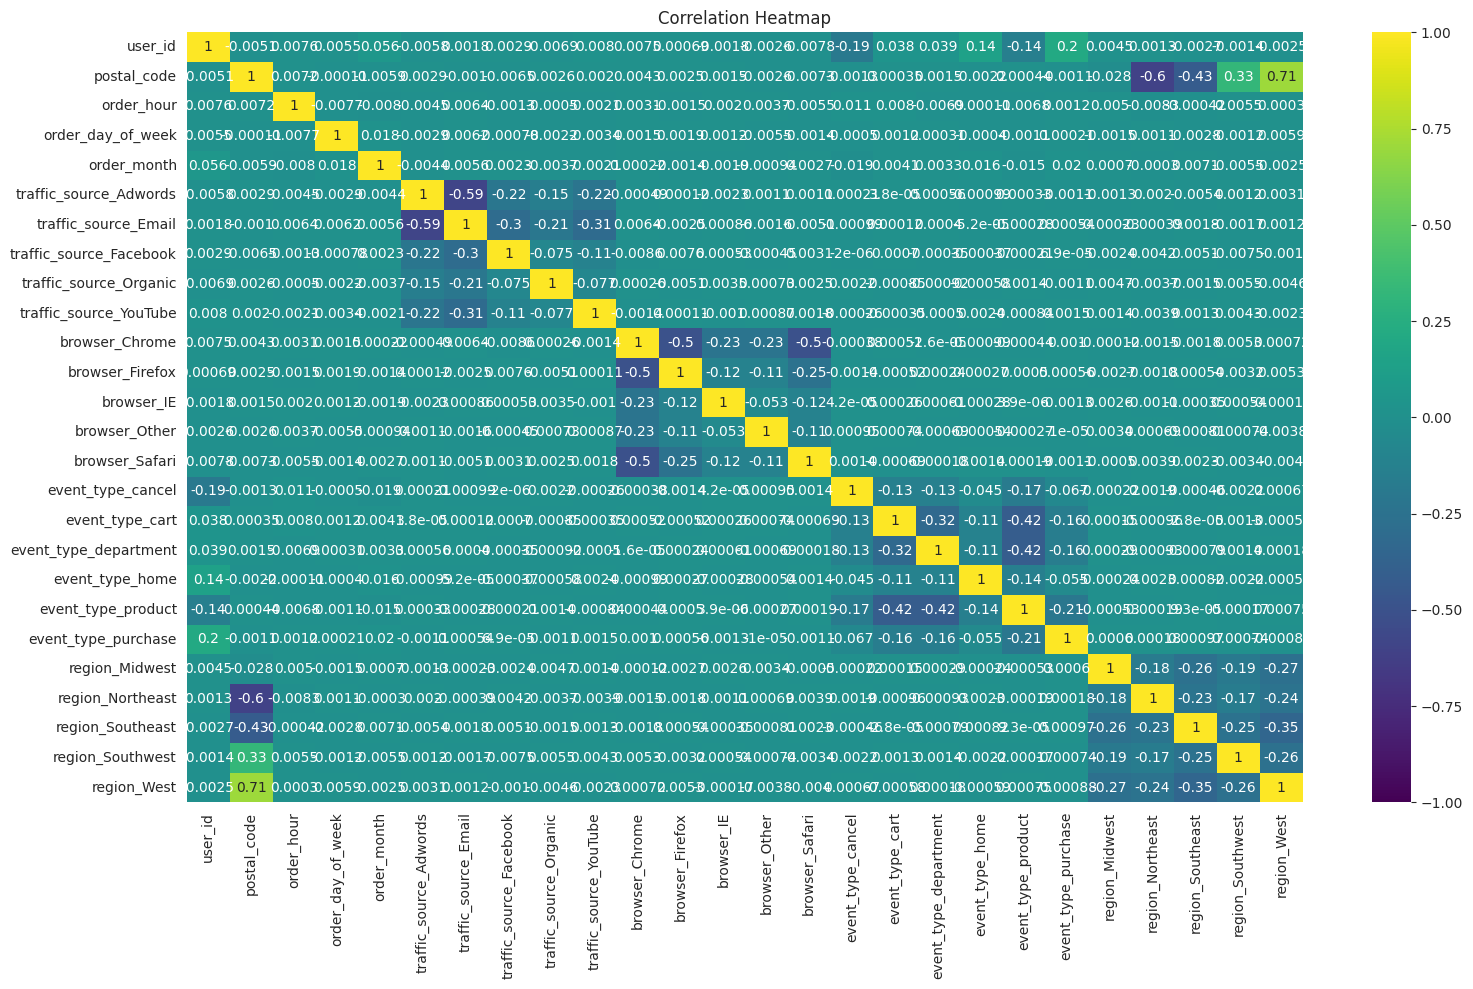

In [71]:
corr_matrix = df_encoded_region.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()